<a href="https://colab.research.google.com/github/Mahshid-git/Emotions/blob/main/02_Model/Emotions_Model_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/drive")
%cd '/content/drive/MyDrive/Emotions/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Emotions


In [ ]:
# pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import nltk
import re
from nltk.corpus import stopwords#, PlainTextCorpusReader
from nltk import word_tokenize, ngrams
from nltk.stem import WordNetLemmatizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from transformers import LlamaTokenizer
from sentence_transformers import SentenceTransformer
from datetime import datetime, date, timedelta
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sentence_transformers'

In [ ]:
data = pd.read_csv('clean_text_final.csv')
data = data[['text', 'label', 'clean_text']]
data.tail()

,text,label,clean_text
416788,i feel like telling these horny devils to find...,2,feel like tell horny devil find site suit sort...
416789,i began to realize that when i was feeling agi...,3,begin realize feel agitate restless think go dish
416790,i feel very curious be why previous early dawn...,5,feel curious previous early dawn time seek tro...
416791,i feel that becuase of the tyranical nature of...,3,feel because tyrannical nature government el s...
416792,i think that after i had spent some time inves...,5,think spend time investigate surround things s...


In [ ]:
# # 384 features
# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')#'sentence-transformers/all_mpnet_base_v2')
# device=torch.device('cuda' if torch.cuda.is_available() else "cpu")
# print(device)
# model.to(device)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

cuda


SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [ ]:
#768 features
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
device=torch.device('cuda' if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

cuda


SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [ ]:
max_i=data.shape[0]
print("Data shape is:", max_i)
batch_size=50000
num_batches=int(max_i/batch_size)
iloc_indexes=[x*batch_size for x in range(num_batches+1)]

Data shape is: 416793


In [ ]:
import os
os.makedirs('embeddings')

In [ ]:
encoded_text_df_list=[]
n=len(data)
for i in iloc_indexes:
    if i+batch_size>max_i:
        end_i=max_i
    else:
        end_i=i+batch_size
    text=data.iloc[i:end_i]['clean_text'].values
    embeddings = model.encode(text)
    embedded_df = pd.DataFrame(embeddings)
    embedded_df.columns=['c_' + str(col) for col in embedded_df.columns]
    embedded_df['clean_text'] = text
    embedded_df['text']=data.iloc[i:end_i]['text'].values
    embedded_df['label']=data.iloc[i:end_i]['label'].values
    encoded_text_df_list.append(embedded_df)
    r=1200000-(n%1000000)
    if ((i!=0) and (i%1000000==0)) or (i+batch_size>max_i):
        # pd.concat(encoded_text_df_list, ignore_index=True).to_csv('embeddings/mpnet_embed_df_part'+str(i)+'.csv', index=False)
        pd.concat(encoded_text_df_list, ignore_index=True).to_parquet('embeddings/mpnet_embed_pq.gzip', compression='gzip')
        print('the first part of data is done and saved')


the first part of data is done and saved


In [ ]:
# pip install pandas pyarrow
import pyarrow

In [ ]:
# embd_data=pd.read_csv('embeddings/mpnet_embed_df_part400000.csv')
embd_data = pd.read_parquet('embeddings/mpnet_embed_pq.gzip')
# embd_data.to_pandas()
embd_data.shape

(416793, 771)

In [ ]:
embd_data.dtypes

c_0           float32
c_1           float32
c_2           float32
c_3           float32
c_4           float32
               ...   
c_766         float32
c_767         float32
clean_text     object
text           object
label           int64
Length: 771, dtype: object

In [ ]:
X = embd_data.drop(['label', 'text', 'clean_text'], axis=1)
y = embd_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [ ]:
# Saving Train and test data for later use in all modeling efforts
# train.to_csv('train_df.csv', index=False)
# test.to_csv('test_df.csv', index=False)
train.to_parquet('embeddings/mpnet_embed_train.gzip', compression='gzip')
test.to_parquet('embeddings/mpnet_embed_test.gzip', compression='gzip')

In [ ]:
del embd_data

# 1- Using Embedded data from MPNet model and LLama Lite pre-trained model as classifier for emotion classification

In [ ]:
# train = pd.read_csv('train_df.csv')
# test = pd.read_csv('test_df.csv',)
train = pd.read_parquet('embeddings/mpnet_embed_train.gzip')
test = pd.read_parquet('embeddings/mpnet_embed_test.gzip')

In [ ]:
train.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_759,c_760,c_761,c_762,c_763,c_764,c_765,c_766,c_767,label
295618,-0.003299,-0.064453,0.009272,0.017402,0.011482,0.038064,-0.084253,0.024690,0.014066,0.045587,...,0.034463,0.037723,-0.036216,-0.020899,0.059896,0.004735,0.061577,-0.014835,-0.030419,1
196464,-0.031354,0.080065,-0.004124,-0.029345,0.018988,0.008856,-0.032705,-0.022570,-0.062099,0.026564,...,-0.006504,-0.034356,-0.024578,0.020467,-0.028522,-0.014376,0.027346,0.054482,0.011646,0
40320,-0.051170,0.042153,0.008348,0.047254,0.057118,0.023626,-0.083844,0.040977,-0.007936,-0.025062,...,0.007521,0.051139,0.000118,-0.000600,0.028527,-0.059338,0.038962,-0.023838,-0.014863,1
184431,0.011904,0.023791,-0.010892,0.033174,-0.009438,0.049019,-0.065774,-0.044684,0.072389,-0.042905,...,0.008433,-0.016304,0.059936,0.002273,0.045776,0.015041,-0.010564,0.033560,0.016066,3
310902,-0.028638,0.030105,0.005782,-0.028855,-0.056989,0.002010,-0.072215,0.034493,0.004033,0.005736,...,-0.017431,0.013621,-0.000678,-0.000719,0.008148,-0.036828,0.020570,0.016858,-0.016429,1


In [ ]:
class EmbeddedDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels
    def __len__(self):
        return len(self.embeddings)
    def __getitem__(self, idx):
        embedding=self.embeddings[idx]
        embedding=torch.tensor(embedding, dtype=torch.float32)
        embedding=embedding.unsqueeze(0)
        return embedding, self.labels[idx]

In [ ]:
import os
current_directory = os.getcwd()
print("Current directory:", current_directory)

Current directory: /content/drive/MyDrive/Emotions


In [ ]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [ ]:
# # No need to run this cell as our labels is already encoded
# label_encoder = preprocessing.LabelEncoder()
# label_encoder.fit(train['label'])
# train['label_coded'] = label_encoder.transform(train['label'])
# test['label_coded'] = label_encoder.transform(test['label'])

In [ ]:
print('train: ', len(train), '\ntest: ', len(test)) #, '\nval: ', len(val)

train:  312594 
test:  104199


In [ ]:
train['label'] = train['label'].astype('category')
test['label'] = test['label'].astype('category')

In [ ]:
train.dtypes

c_0       float32
c_1       float32
c_2       float32
c_3       float32
c_4       float32
           ...   
c_764     float32
c_765     float32
c_766     float32
c_767     float32
label    category
Length: 769, dtype: object

## Prepare model input for model training and validation

In [ ]:
train_embeddings = np.stack(train.drop('label', axis=1).iloc[:,:768].values) # was 768
train_labels= train['label'].values
train_dataset= EmbeddedDataset(train_embeddings, train_labels)
train_loader= DataLoader(train_dataset, batch_size=128, shuffle=True)

In [ ]:
test_embeddings= np.stack(test.drop('label', axis=1).iloc[:,:768].values) # was 768
test_labels= test['label'].values
test_dataset= EmbeddedDataset(test_embeddings, test_labels)
test_loader= DataLoader(test_dataset, batch_size=128, shuffle=True)

In [ ]:
num_labels= len(train['label'].unique())
print(num_labels)

6


In [ ]:
train_embeddings.shape

(312594, 768)

In [ ]:
from transformers import LlamaForSequenceClassification, AdamW
model_name='skeskinen/llama-lite-134m'
model=LlamaForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
optimizer= AdamW(model.parameters(), lr=2e-5, weight_decay=1e-2)
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device: ', device)
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at skeskinen/llama-lite-134m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


device:  cuda


LlamaForSequenceClassification(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 768, padding_idx=0)
    (layers): ModuleList(
      (0-11): 12 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=768, out_features=768, bias=False)
          (k_proj): Linear(in_features=768, out_features=768, bias=False)
          (v_proj): Linear(in_features=768, out_features=768, bias=False)
          (o_proj): Linear(in_features=768, out_features=768, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=768, out_features=2048, bias=False)
          (up_proj): Linear(in_features=768, out_features=2048, bias=False)
          (down_proj): Linear(in_features=2048, out_features=768, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRMSNorm()
  

In [ ]:
num_epochs=30
best_test_loss=float('inf')
patience=3
patience_counter=0
best_accuracy=-1
test_accuracy_list = []
train_accuracy_list = []
test_loss_list = []
train_loss_list = []
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    # cm = torch.zeros(num_labels,num_labels) # confusion matrix
    for batch in train_loader:
        embeddings=batch[0].to(device)
        labels=batch[1].to(device)
        optimizer.zero_grad()
        outputs= model(inputs_embeds=embeddings, labels=labels)
        loss= outputs.loss
        total_loss+= loss.item()
        loss.backward()
        optimizer.step()
    average_loss= total_loss / len(train_loader)
    print (f'Epoch: {epoch+1}, Loss: {average_loss}')
    train_loss_list.append(average_loss)

    model.eval()
    test_loss= 0
    correct_predictions= 0
    with torch.no_grad():
        for batch in test_loader:
            embeddings=batch[0].to(device)
            labels=batch[1].to(device)

            outputs= model(inputs_embeds=embeddings, labels=labels)
            test_loss+= outputs.loss.item()

            logits= outputs.logits
            _, predicted_labels = torch.max(logits, dim=1)
            correct_predictions += torch.sum(predicted_labels==labels)


    average_test_loss = test_loss/len(test_loader)
    accuracy = correct_predictions/len(test_dataset)
    test_accuracy_list.append(accuracy)
    test_loss_list.append(average_test_loss)
    print(f'Test Loss: {average_test_loss}, Accuracy: {accuracy}')


    if accuracy > best_accuracy:
        best_accuracy= accuracy
        patience_counter=0
        torch.save({'model.state_dict()': model.state_dict(), 'optimizer.state_dict()': optimizer.state_dict()}, 'model.pt')
        patience_counter=0
    else:
        patience_counter+=1
    if patience_counter>=patience:
        print('Early stopping Triggered')
        break

Epoch: 1, Loss: 0.3046323624677801
Test Loss: 0.6535822663021965, Accuracy: 0.7707463502883911
Epoch: 2, Loss: 0.1996383259223101
Test Loss: 0.7768639825970117, Accuracy: 0.7609189748764038
Epoch: 3, Loss: 0.15915359851587418
Test Loss: 0.8739689473542699, Accuracy: 0.7588076591491699
Epoch: 4, Loss: 0.1399419768940241
Test Loss: 0.9555938679747786, Accuracy: 0.7621186375617981
Early stopping Triggered


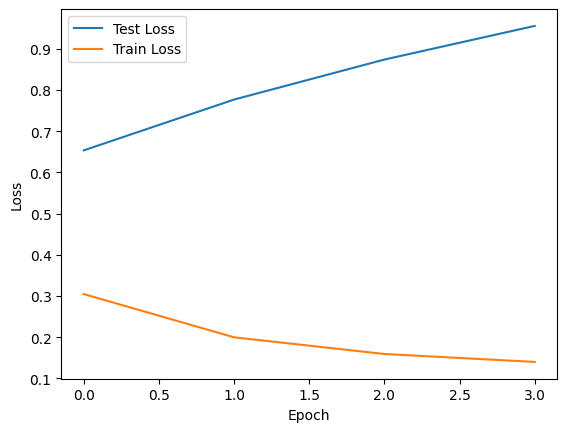

In [ ]:
epochs_ = range(epoch+1)
plt.plot(epochs_, test_loss_list, label='Test Loss')
plt.plot(epochs_, train_loss_list, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_accuracy_list # list of torch tensors
test_accuracy_list2 = []
for item in test_accuracy_list:
  test_accuracy_list2.append(item.detach().cpu().numpy())

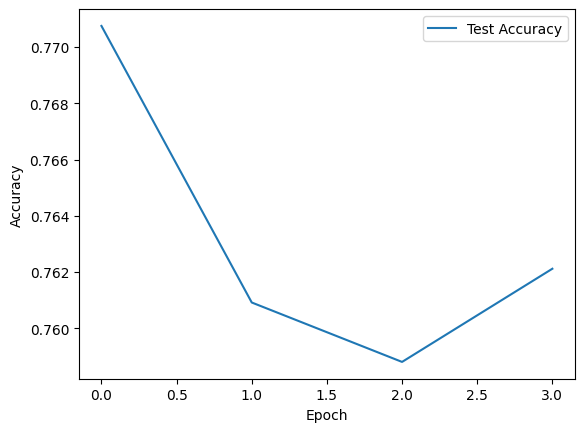

In [ ]:
plt.plot(epochs_, test_accuracy_list2, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
cm = torch.zeros(num_labels,num_labels) # confusion matrix
correct_predictions_test = 0
total_predictions_test = 0
per_class_correct_predictions = [0] * num_labels
per_class_total_predictions = [0] * num_labels
per_class_accuracy_list = []
with torch.no_grad():
    for batch in test_loader:
        embeddings=batch[0].to(device)
        labels=batch[1].to(device)

        outputs= model(inputs_embeds=embeddings, labels=labels)
        test_loss+= outputs.loss.item()

        logits= outputs.logits
        _, predicted_labels_test = torch.max(logits, dim=1)
        correct_predictions += torch.sum(predicted_labels_test==labels)

        for i in range(len(labels)):
                label = labels[i].item()
                prediction = predicted_labels_test[i].item()
                per_class_correct_predictions[label] += int(label == prediction)
                per_class_total_predictions[label] += 1
        per_class_accuracy = [correct / total if total > 0 else 0.0 for correct, total in zip(per_class_correct_predictions, per_class_total_predictions)]
        per_class_accuracy_list.append(per_class_accuracy)

In [ ]:
# Print per-class accuracy
per_class_names = [f"Class {i}" for i in range(num_labels)]
class_to_emotion = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
accuracy_per_class0 = []
for i in range(num_labels):
  emotion = class_to_emotion[i]
  accuracy_per_class0.append({emotion:per_class_correct_predictions[i]/per_class_total_predictions[i]})
print(accuracy_per_class0)

[{'sadness': 0.8496171111697914}, {'joy': 0.819089207735496}, {'love': 0.4989003356870008}, {'anger': 0.7010050251256281}, {'fear': 0.6790475391967804}, {'surprise': 0.6232968207320331}]


# Method 2: MultiNomial Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')